<a href="https://colab.research.google.com/github/captmmari/Independent-week4-project/blob/main/Moringa_Independent_week02_Core_Project_Simon_Mmari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importing libraries

In [19]:
# Import pandas
import pandas as pd
# importing numpy
import numpy as np
# import seaborn
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# 1.1 Loading Datasets

In [9]:
# Loading financial dataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
# Loading variable Definitions
df1 = pd.read_csv('/content/VariableDefinitions.csv')
df1

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#1.2 Checking dataset info

In [11]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [12]:
# Data description
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# 1.3 Cleaning dataset


In [13]:
# Checking for null
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
# Replacing null values with o
df.fillna(0).head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
# Checking for duplicated data
print(df.duplicated().sum())

0


# 1.4 Univariate analysis

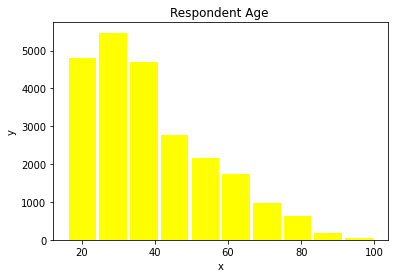

In [16]:
# Histogram of respondet age 
df_res = df['Respondent Age']
plt.hist(df_res, bins=10, color='yellow', histtype='bar', rwidth=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Respondent Age ')
plt.show()

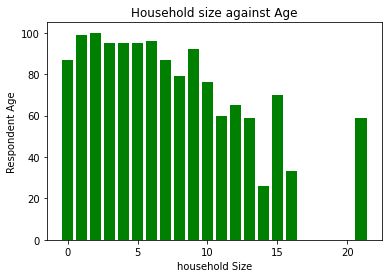

In [11]:
# Bar chart representing respondent age by Household size
df_mar = df['household_size']
df_mur = df['Respondent Age']
plt.bar(df_mar, df_mur, color='green')
plt.xlabel('household Size')
plt.ylabel('Respondent Age')
plt.title('Household size against Age')
plt.show()

ValueError: ignored

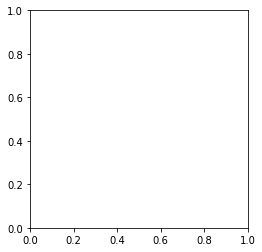

In [12]:
gender_of_Respondent = df['gender_of_respondent']
Has_a_Bank= df['Has a Bank account']
plt.pie(gender_of_Respondent, labels = Has_a_Bank, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender respondents')
plt.show()

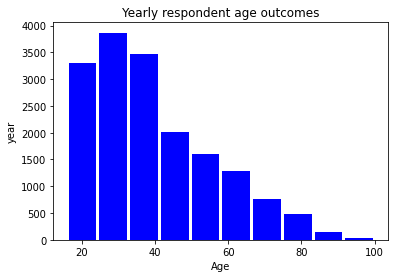

In [13]:
# 
df_res = df['Respondent Age']
#df_year = df['year']
#df_res = df['Respondent Age']
plt.hist(df_res, histtype='bar', rwidth = 0.9, bins = 10, color = 'blue')
plt.title('Yearly respondent age outcomes')
plt.xlabel('Age')
plt.ylabel('year')
plt.show()

In [14]:

# Finding mean value for the Respondent Age
df['Respondent Age'].mean()

39.276280879665116

In [15]:
# finding the modal value of gender respondent
df['gender_of_respondent'].mode()

0    Female
dtype: object

In [21]:
# finding area mostly recorded
df['Type of Location'].mode()

0    Rural
dtype: object

In [16]:
# Finding modal value of people with or without bank account
df['Has a Bank account'].mode()

0    No
dtype: object

In [17]:
# Finding the median value of household size
df['household_size'].median()

4.0

In [18]:
# finding the standard deviation of respondent age
df['Respondent Age'].std()

16.647679855269864

In [25]:
# Finding the average number of ages recorded
df['Respondent Age'].mode()

0    30.0
dtype: float64

In [22]:
# Finding modal year recorded
df['year'].mode()

0    2016
dtype: int64

In [19]:
# finding the variance of respondent age
df['Respondent Age'].var()

277.14524456355804

In [20]:
# finding the range of respondent age
df_max = df['Respondent Age'].max()
df_min = df['Respondent Age'].min()
df_max - df_min

84.0

In [21]:
#Finding the quartile values
df['Respondent Age'].quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    50.0
Name: Respondent Age, dtype: float64

In [22]:
# Determining the skewness
df['Respondent Age'].skew()

0.803873763802655

In [23]:
# Kurtois
df['Respondent Age'].kurt()

0.010885315961473463

In [24]:
# Displaying the summary statistics of the dataframe
df['Respondent Age'].describe()

count    16961.000000
mean        39.276281
std         16.647680
min         16.000000
25%         26.000000
50%         35.000000
75%         50.000000
max        100.000000
Name: Respondent Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


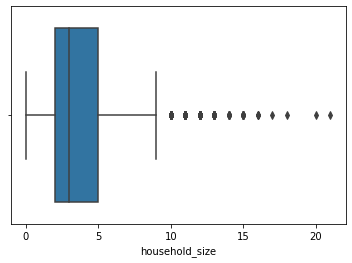

In [ ]:
# Looking for Outliers
sns.boxplot(df['household_size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


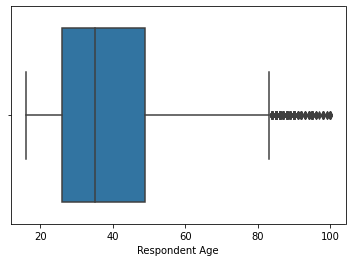

In [ ]:
# Looking for outliers
sns.boxplot(df['Respondent Age'])

# 1.5 Bivariate Analysis

In [25]:
# Checking Dataset records
df.shape

(16983, 13)

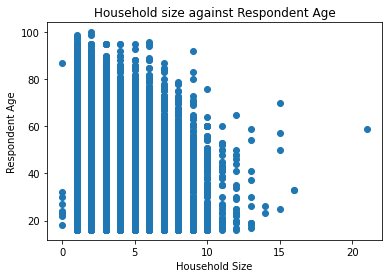

In [26]:
# scatter plot between household size and Respondent Age
df.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')


plt.scatter(df["household_size"] , df["Respondent Age"])
plt.title('Household size against Respondent Age')
plt.xlabel('Household Size')
plt.ylabel('Respondent Age')
plt.show()

In [27]:
# Determining the realationship between Household size and Respondent Age
pearson_coeff = df["household_size"].corr(df["Respondent Age"], method="pearson") 
print(pearson_coeff)


coeff = df["household_size"].corr(df["Respondent Age"]) 
print(coeff)

-0.15463524380003402
-0.15463524380003402


In [28]:
# Calculating the pearson coefficient
df["household_size"].corr(df["Respondent Age"]) 

-0.15463524380003402

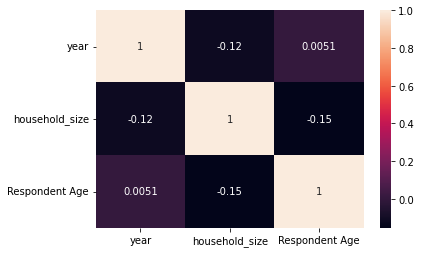

In [29]:
# Heatmap of given dataset
sns.heatmap(df.corr(),annot=True)
plt.show()

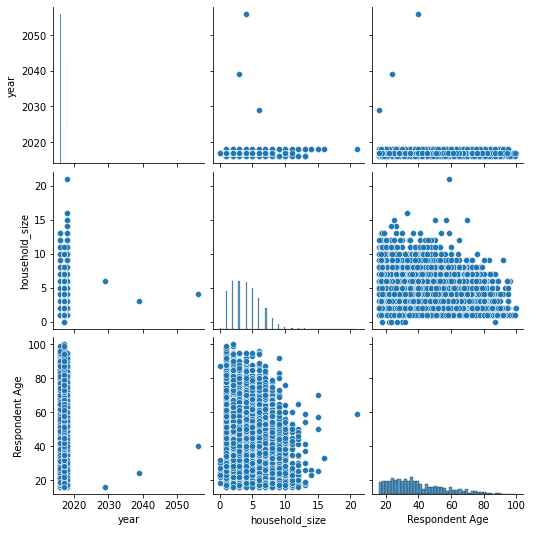

In [30]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

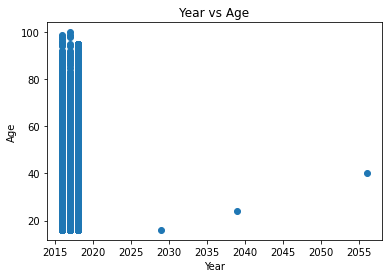

In [31]:
# Scatter plot of Year and respondent age
plt.scatter(df['year'], df['Respondent Age'])
plt.title('Year vs Age')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

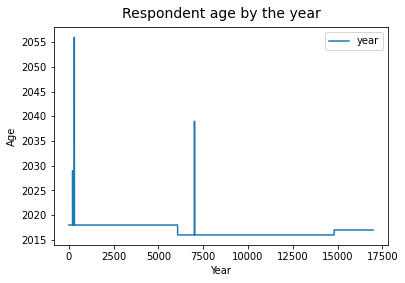

In [34]:
df[["year"]].plot()
plt.title("Respondent age by the year", fontsize=14, y=1.015)
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

In [37]:
# Z test from year column
a = np.array(df['year'])
stats.zscore(a)

array([1.16769528, 1.16769528, 1.16769528, ..., 0.1547742 , 0.1547742 ,
       0.1547742 ])

# 1.6 Multivariate Analysis

In [ ]:
# previewing dataset columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
df.drop(['The relathip with head', 'uniqueid'], axis=1, inplace=True)

In [ ]:
# Dropping missing values
df.dropna(inplace=True)

In [38]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(652.9760782210658, 5.193405234384958e-92)

In [17]:
# Dividing dataset given
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [18]:
# Diving dataset in training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 1.7 Solutions

1. Most people Don't have bank accounts.
2. Most data was picked from the rural areas
3. 2016 Had the most number of data recorded of the three years
4. Most people with bank accounts are aged 30